# ABX plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from itertools import product

import numpy as np
import pandas as pd

import utils


In [2]:
file_name = "data/pca_dimension_reduction_features_20D_abx.csv"
#file_name = "data/lda_dimension_reduction_features_20D_abx.csv"
#file_name = "data/lstm_autoencoder_features_20D_abx.csv"
#file_name = "data/tripletloss_embeddings_features_20D_abx.csv"

abx = pd.read_csv(file_name, sep="\t", header=None, names=["call_2", "call_1", "abx", "n"])

In [3]:
call2species = {'1':'Putty nosed', '2':'Putty nosed', '3':'Putty nosed', '4':'Putty nosed',
                
                'A':'Blue monkeys', 'A*':'Blue monkeys', 'KA':'Blue monkeys', 
                'KATR':'Blue monkeys', 'Nscrm':'Blue monkeys', 'PY':'Blue monkeys', 
                'BO':'Blue monkeys', 'h':'Blue monkeys', 'p':'Blue monkeys',
                
                'A_titi':'Titi', 'B':'Titi', 'BS':'Titi', 'Bw':'Titi',  'C':'Titi', 'H':'Titi', 'x':'Titi',
                
                'H':'Campbell', 'K':'Campbell', 'K+':'Campbell', 'W':'Campbell', 'W+':'Campbell', 'K+/W+':'Campbell',
                
                'r':'Colobus', 's':'Colobus'}


calls = {'Campbell': [['H', 'W', 'W+'], ['K', 'K+']],
         'Blue monkeys': [['KA', 'KATR', 'h'], ['PY', 'p']],
         'Putty nosed': [['1'], ['2', '3', '4']],
         'Titi': [['B', 'BS', 'Bw'], ['A_titi', 'C', 'x']]}

abx = utils.separate_calls(abx, calls)

abx = abx.query("type in ['same', 'diff']")

abx['specie'] =  [call2species[x] for x in abx.call_2]


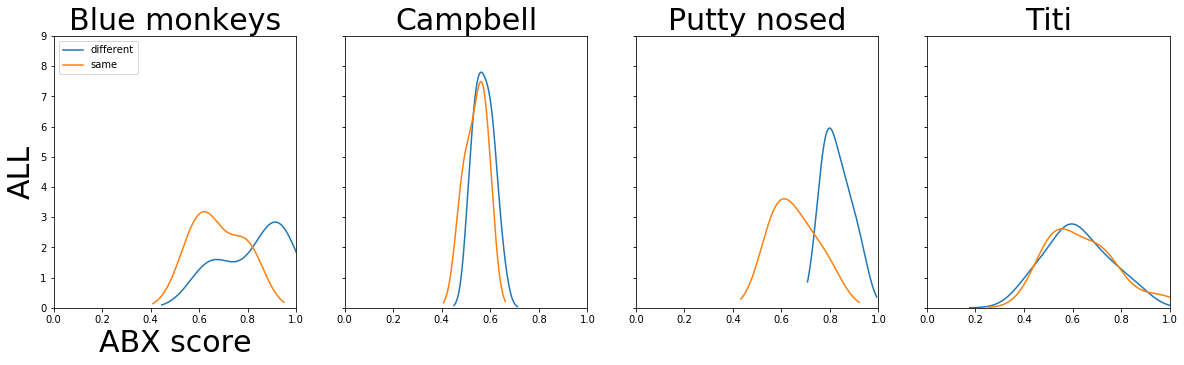

In [4]:
param = {'kind':'kde', 'xlim':(0, 1.0), 'ylim':(0,9), 'sharex':True, 'sharey':True}
species = sorted(list(set(abx.specie)))

try:
    fig, axes = plt.subplots(nrows=1, ncols=len(species), figsize=(20, 5))
    for n, s in enumerate(species):
        abx[abx.specie == s].groupby('type')['abx'].plot(ax=axes[n], **param); 
        axes[n].set_title(s, fontsize=30)
    
    axes[0].legend(["different", "same"], loc=2)
    axes[0].set_xlabel("ABX score", fontsize=30)
    axes[0].set_ylabel("ALL", fontsize=30)
    
except:
    print("***check abx scores, values must be all similar and it is not possible to plot a kde***")
    abx.head()
